In [113]:
# pip install tensorflow

In [114]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [115]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

This line loads the MNIST dataset using Keras. MNIST (Modified National Institute of Standards and Technology) is a famous dataset of handwritten digits (0-9) used for training image classification models.

It returns two tuples:
(x_train, y_train): Training data (images and their labels)
(x_test, y_test): Testing data (images and their labels)

In [ ]:
✅ x_train and x_test are grayscale images of handwritten digits from 0 to 9.
✅ Each image is of size 28x28 pixels (2D array).
✅ The pixel values range from 0 (black) to 255 (white).

In [116]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [117]:
len(x_train)

60000

In [118]:
len(y_train)

60000

In [119]:
x_train[0].shape

(28, 28)

In [120]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

plt.matshow() is a function in Matplotlib that is used to display a matrix (2D array) as an image. It is commonly used for visualizing grayscale images, like handwritten digits from the MNIST dataset.

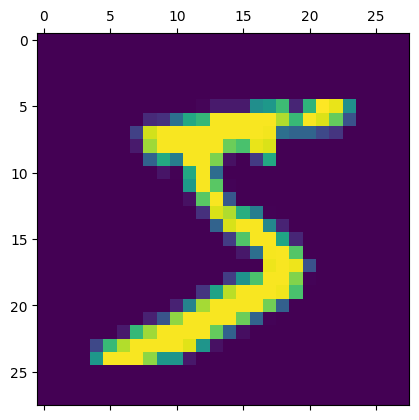

In [121]:
plt.matshow(x_train[0])

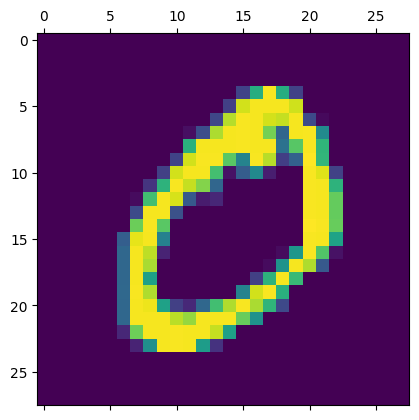

In [122]:
plt.matshow(x_train[1])


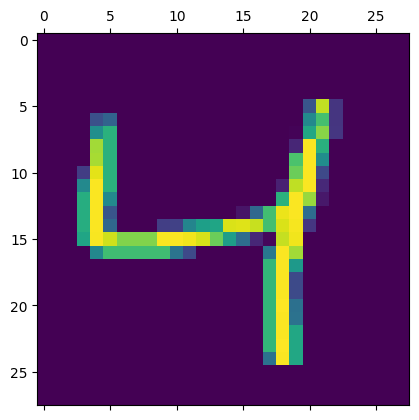

In [123]:
plt.matshow(x_train[2])

In [124]:
y_train[2]

4

In [125]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [126]:
x_train.shape

(60000, 28, 28)

In [127]:
x_train=x_train/255
x_test=x_test/255

In [128]:
x_train_flatten=x_train.reshape(len(x_train),28*28)
x_test_flatten=x_test.reshape(len(x_test),28*28)

In [129]:
x_train_flatten

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [130]:
x_train_flatten.shape

(60000, 784)

In [131]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
model.fit(x_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8073 - loss: 0.7294
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9146 - loss: 0.3060
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9198 - loss: 0.2868
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9228 - loss: 0.2765
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9262 - loss: 0.2663


In [132]:
model.evaluate(x_test_flatten,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9161 - loss: 0.3030


[0.2683456540107727, 0.9261999726295471]

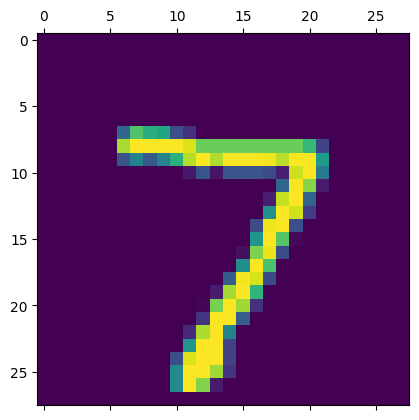

In [156]:
plt.matshow(x_test[0])

In [158]:
y_predicted=model.predict(x_test_flatten)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([3.1121172e-02, 2.3739912e-07, 5.5214707e-02, 9.4589573e-01,
       2.5296265e-03, 9.8260410e-02, 2.1439728e-06, 9.9970770e-01,
       7.5202137e-02, 7.0637602e-01], dtype=float32)

In [160]:
np.argmax(y_predicted[0])

7